___

<a href='http://www.pieriandata.com'> <img src='../Pierian_Data_Logo.png' /></a>
___
# Logistic Regression Project 

In this project we will be working with a fake advertising dataset, indicating whether or not a particular internet user clicked on an Advertisement. 

We will try to create a model that will predict whether or not they will click on an ad based on the features of that user.

The dataset contains the following features:

* **Daily Time Spent on Site**: Customer time on site in minutes per day
* **Age**: Customer age in years
* **Area Income**: Avg. income of the geographical area of customer
* **Daily Internet Usage**: Avg. minutes per day a customer is on the internet
* **Ad Topic Line**: Headline of the advertisement
* **City**: City of customer
* **Male**: Whether or not customer is male
* **Country**: Country of customer
* **Timestamp**: Time at which customer clicked on ad or closed the ad window
* **Clicked on Ad**: *Binary* column with 1 or 0 to indicate whether customer clicked on ad or not (TARGET VARIABLE)

## Import Libraries

**Import a few libraries you think you'll need (or just import them as you go along)**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

## Get the Data
**Read in the advertising.csv file and set it to a data frame called ad_data.**

In [2]:
ad_data = pd.read_csv('advertising.csv')

**Check the head of ad_data**

In [3]:
ad_data.head()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Male,Country,Timestamp,Clicked on Ad
0,68.95,35,61833.90,256.09,Cloned 5thgeneration orchestration,Wrightburgh,0,Tunisia,2016-03-27 00:53:11,0
1,80.23,31,68441.85,193.77,Monitored national standardization,West Jodi,1,Nauru,2016-04-04 01:39:02,0
2,69.47,26,59785.94,236.50,Organic bottom-line service-desk,Davidton,0,San Marino,2016-03-13 20:35:42,0
3,74.15,29,54806.18,245.89,Triple-buffered reciprocal time-frame,West Terrifurt,1,Italy,2016-01-10 02:31:19,0
4,68.37,35,73889.99,225.58,Robust logistical utilization,South Manuel,0,Iceland,2016-06-03 03:36:18,0


**Use `info()` and `describe()` on ad_data**

In [4]:
# 1000 rows, 10 columns (no missing values)
# Note that timestamp is string column

ad_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Daily Time Spent on Site  1000 non-null   float64
 1   Age                       1000 non-null   int64  
 2   Area Income               1000 non-null   float64
 3   Daily Internet Usage      1000 non-null   float64
 4   Ad Topic Line             1000 non-null   object 
 5   City                      1000 non-null   object 
 6   Male                      1000 non-null   int64  
 7   Country                   1000 non-null   object 
 8   Timestamp                 1000 non-null   object 
 9   Clicked on Ad             1000 non-null   int64  
dtypes: float64(3), int64(3), object(4)
memory usage: 78.2+ KB


In [5]:
ad_data.describe()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Male,Clicked on Ad
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000
mean,65.000200,36.009000,55000.000080,180.000100,0.481000,0.50000
std,15.853615,8.785562,13414.634022,43.902339,0.499889,0.50025
min,32.600000,19.000000,13996.500000,104.780000,0.000000,0.00000
25%,51.360000,29.000000,47031.802500,138.830000,0.000000,0.00000
50%,68.215000,35.000000,57012.300000,183.130000,0.000000,0.50000
75%,78.547500,42.000000,65470.635000,218.792500,1.000000,1.00000
max,91.430000,61.000000,79484.800000,269.960000,1.000000,1.00000


In [ ]:
# On average, a consumer spends half their internet time on the advertising site 

### Categorical variables

In [12]:
# 969 cities

ad_data['City'].nunique()

969

In [62]:
# 237 countries

ad_data['Country'].value_counts().head()

France            9
Czech Republic    9
Peru              8
Turkey            8
Greece            8
Name: Country, dtype: int64

In [6]:
# Well-balanced gender counts (the average value is almost 0.5)
ad_data['Male'].value_counts()

0    519
1    481
Name: Male, dtype: int64

### Target variable

In [16]:
# Extremely well-balanced!
ad_data['Clicked on Ad'].value_counts()

0    500
1    500
Name: Clicked on Ad, dtype: int64

## Exploratory Data Analysis

Let's use Seaborn to explore the data by trying to recreate the plots shown below.

**Create a histogram of the Age**

In [21]:
sns.set_style('whitegrid')

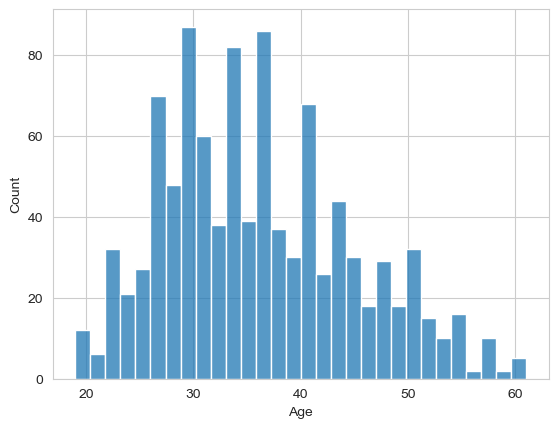

In [22]:
sns.histplot(data=ad_data, x='Age', bins=30);

In [ ]:
# The average value sits between 30 and 40 years old, with distribution leaning towards younger ages
# Quite normally distributed from 28 to 34 years

**Create a jointplot showing Area Income versus Age.**

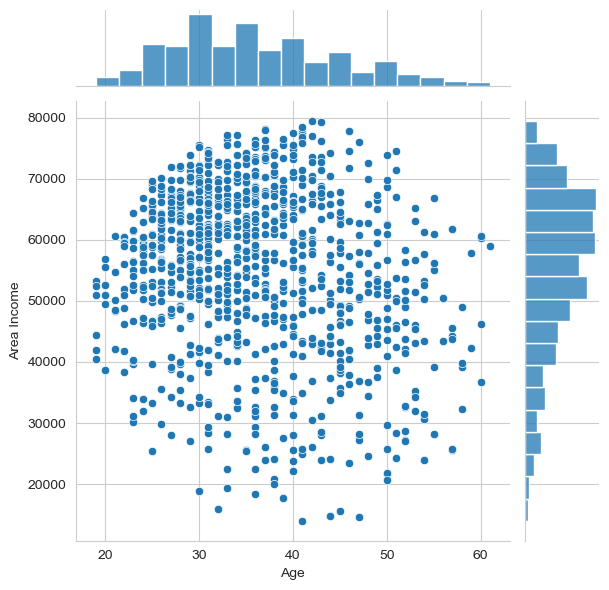

In [24]:
sns.jointplot(x='Age', y='Area Income', data=ad_data);

In [ ]:
# Quite scattered but we can see that you start earning when you reach 20 years, which makes sense!
# The dots are more dense around ages 25 to 35 earning the higher incomes in the area

**Create a jointplot showing the kde distributions of Daily Time spent on site vs. Age.**

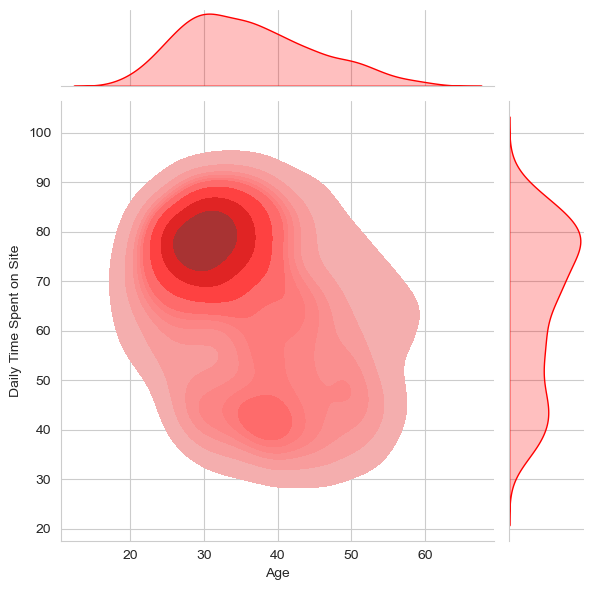

In [31]:
sns.jointplot(x='Age', y='Daily Time Spent on Site', data=ad_data, kind='kde', color='red', fill=True);

In [ ]:
# Concentration of the distribution occurs around ages 25 to 35, who spend between 70 and 90 mins per day on the site
# There is another smaller cluster around 38 years old, who spend about 40-45 mins per day on the site

**Create a jointplot of 'Daily Time Spent on Site' vs. 'Daily Internet Usage'**

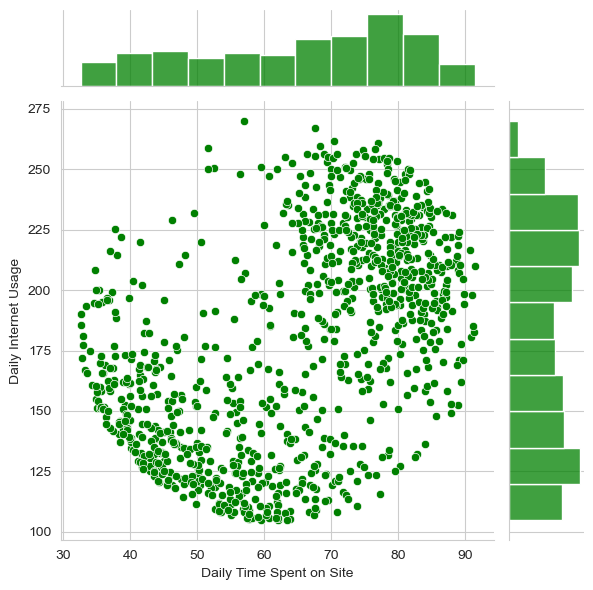

In [33]:
sns.jointplot(x='Daily Time Spent on Site', y='Daily Internet Usage', data=ad_data, color='green');

In [ ]:
# Bimodal distribution, with two clusters, showing general trend that more time on internet means more time spent on the site

**Finally, create a pairplot with the hue defined by the 'Clicked on Ad' column feature.**

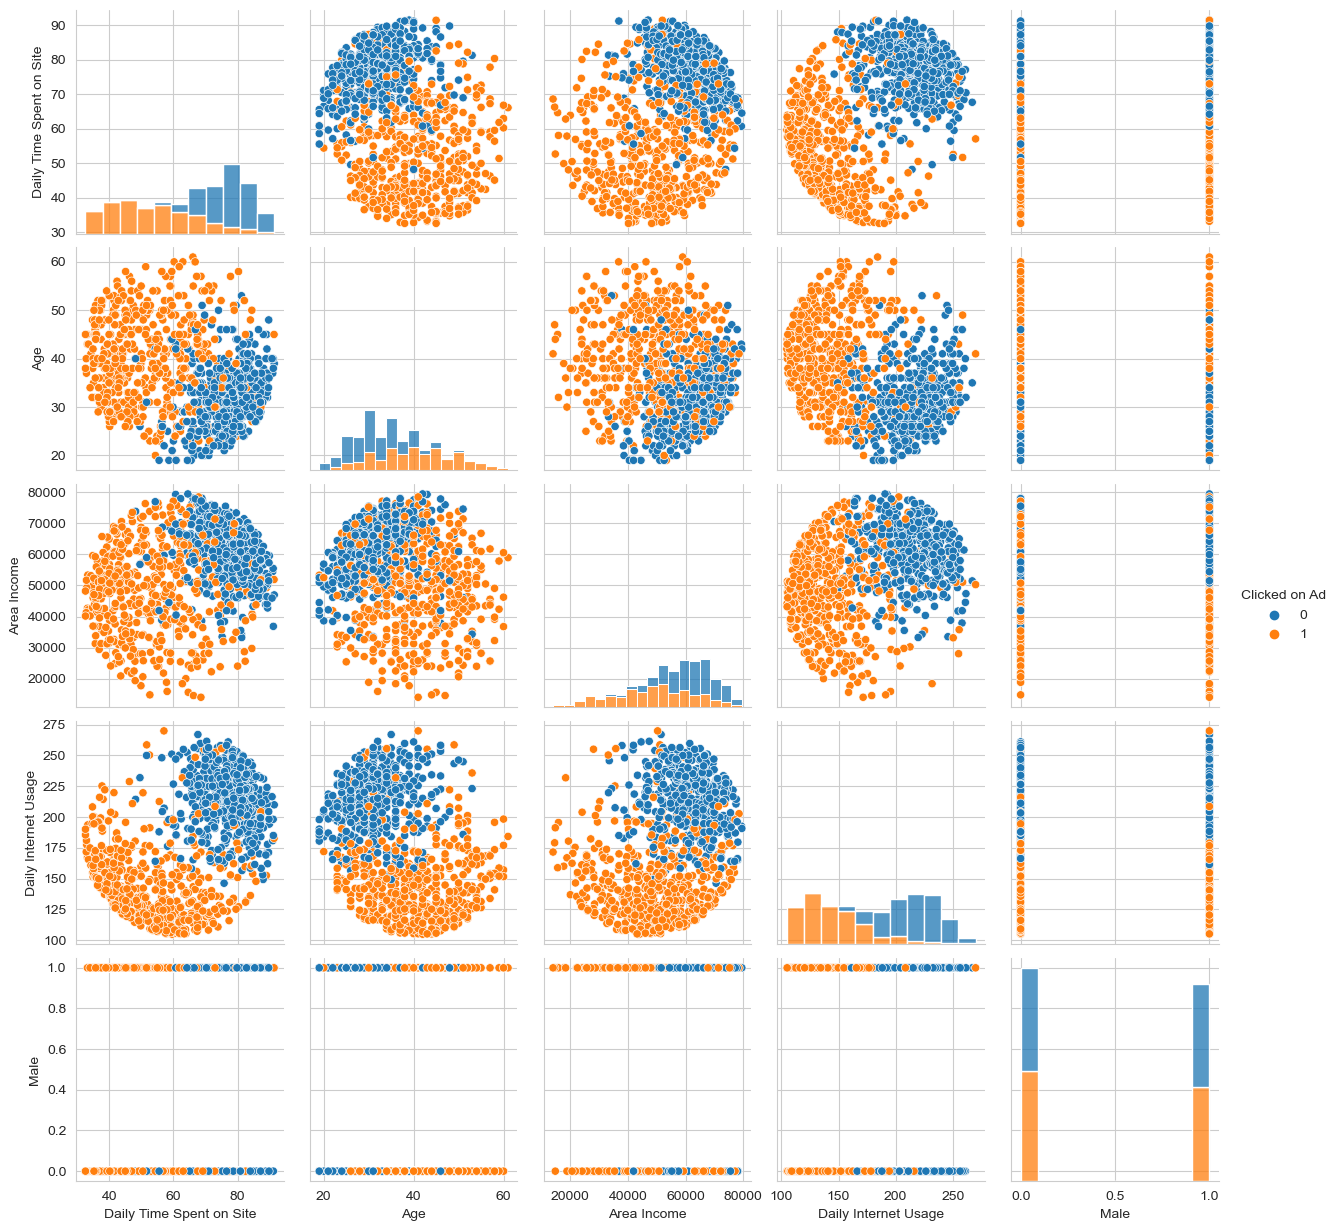

In [36]:
# Seaborn automatically 'layers' bars in histograms - use multiple=stacks to make sure they show as 'stacked'
sns.pairplot(ad_data, hue='Clicked on Ad', diag_kind='hist', diag_kws={'multiple': "stack"});

In [ ]:
# There seems a slight trend between Area income and Daily internet usage 
# - those who earn less and spend less time on internet tend to click on the advert

# Logistic Regression

Now it's time to train-test-split the data, and train our model.

You'll have the freedom here to choose columns that you want to train on.

In [37]:
ad_data.head()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Male,Country,Timestamp,Clicked on Ad
0,68.95,35,61833.90,256.09,Cloned 5thgeneration orchestration,Wrightburgh,0,Tunisia,2016-03-27 00:53:11,0
1,80.23,31,68441.85,193.77,Monitored national standardization,West Jodi,1,Nauru,2016-04-04 01:39:02,0
2,69.47,26,59785.94,236.50,Organic bottom-line service-desk,Davidton,0,San Marino,2016-03-13 20:35:42,0
3,74.15,29,54806.18,245.89,Triple-buffered reciprocal time-frame,West Terrifurt,1,Italy,2016-01-10 02:31:19,0
4,68.37,35,73889.99,225.58,Robust logistical utilization,South Manuel,0,Iceland,2016-06-03 03:36:18,0


**Split the data into training set and testing set using train_test_split**

In [38]:
# Features: Daily time on Site, Age, Area Income, Daily Internet Usage and Male (5 features is quite a lot...)

X = ad_data.drop(['Ad Topic Line', 'City', 'Country', 'Timestamp', 'Clicked on Ad'], axis=1)

In [39]:
y = ad_data['Clicked on Ad']

In [40]:
X.head()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Male
0,68.95,35,61833.90,256.09,0
1,80.23,31,68441.85,193.77,1
2,69.47,26,59785.94,236.50,0
3,74.15,29,54806.18,245.89,1
4,68.37,35,73889.99,225.58,0


In [42]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.6)

**Train and fit a logistic regression model on the training set.**

In [43]:
from sklearn.linear_model import LogisticRegression

In [44]:
logreg = LogisticRegression()

In [45]:
logreg.fit(X_train, y_train)

LogisticRegression()

## Predictions and Evaluations

**Predict values for the testing data.**

In [46]:
y_pred = logreg.predict(X_test)

**Create a classification report for the model**

In [47]:
from sklearn.metrics import classification_report

In [48]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.88      0.95      0.91       183
           1       0.95      0.89      0.92       217

    accuracy                           0.92       400
   macro avg       0.91      0.92      0.91       400
weighted avg       0.92      0.92      0.92       400



In [ ]:
# Quite high scores across the board! The predictions are quite close to the target
# You may be able to add more input with Country names
# You could convert timestamp to datetime to see effects of time of day (e.g. morning, afternoon, evening)
# And most importantly, you could 'standardize' numerical predictors!! Logistic Regression likes scaled data...

In [50]:
ad_data['Timestamp'].max()

'2016-07-24 00:22:16'

In [51]:
# This allows you to use go.figure() function
import plotly.graph_objs as go

from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot

In [52]:
init_notebook_mode(connected=True) 

In [66]:
data = dict(type='choropleth', 
            colorscale='blues', 
            locations=ad_data['Country'], 
            locationmode='country names', 
            z=ad_data['Daily Internet Usage'], 
            colorbar={'title': 'Daily Internet Usage'})

In [67]:
layout = dict(title='2016 Daily Internet Usage per Country, based on customers of Advertising company', 
                   geo=dict(showframe=False, projection={'type': 'natural earth'}))

In [68]:
choromap = go.Figure(data=[data], layout=layout)

In [69]:
iplot(choromap)

## Great Job!